In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math as math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Normalising data set
def normalise(df):
    for i in range(df.shape[1]):
        st = df.columns[i]
        if(st == 'count'):
            df[st] = (df[st]-df_train[st].min())/(df_train[st].max()-df_train[st].min())
            continue
        df[st] = (df[st]-df[st].min())/(df[st].max()-df[st].min())

In [3]:
#De-Normalising data set
def denormalise_count(lamda):
    lamda_ret = ((lamda*(df_train['count'].max()-df_train['count'].min()))+df_train['count'].min())
    return lamda_ret

In [4]:
#Calculating RMSE
def calc_RMSE(yp,y):
    RMSE = (np.power(yp-y,2))/yp.shape
    RMSE = sum(RMSE)**(1/2)
    return RMSE

In [5]:
def calc_RMSLE(yp,y):
    RMSLE = (np.power(np.log(yp+1)-np.log(y+1),2))/yp.shape
    RMSLE = sum(RMSLE)**(1/2)
    return RMSLE

In [6]:
#Gradient descent for estimating parameters 
def grad_descent(x,y):
    w_curr = np.full((x.shape[1]), 0.1,dtype = np.float128)/10000
    alpha = 0.0006
    iterations = 100
    
    for i in range(iterations):
        mu = np.exp(x@w_curr)
        print("w = ", w_curr)
        Loss = y*np.log(mu+0.00000000001)
        Loss = sum(mu-Loss)
        Loss = Loss
        print("Loss = ", Loss)
        res = mu-y
        delta_w = alpha*(sum(x*res[np.newaxis,:].T)) 
        w_curr = w_curr-delta_w
    return w_curr

In [7]:
#Lasso Regression
def lasso_regression(x,y):
    w_curr = np.full((x.shape[1]), 0.1,dtype = np.float128)/10000
    alpha = 0.0006
    iterations = 100
    tune_param = 0.5
    
    for i in range(iterations):
        mu = np.exp(x@w_curr)
        print("w = ", w_curr)
        
        Loss = y*np.log(mu+0.00000000001)
        Loss = sum(mu-Loss)
        w_mod = np.abs(w_curr)
        Loss = Loss + tune_param*(sum(w_mod))
        print("Loss = ", Loss)
        res = mu-y
        delta_w = sum(x*res[np.newaxis,:].T)
        for index,value in np.ndenumerate(delta_w):
            if value>0:
                delta_w[index] += tune_param*len(w_curr)
            else:
                delta_w[index] -= tune_param*len(w_curr)
        delta_w = (alpha*delta_w)
        w_curr = w_curr-delta_w
        print("========================")
    return w_curr

In [8]:
#Ridge Regression
def ridge_regression(x,y):
    w_curr = np.full((x.shape[1]), 0.1, dtype = np.float128)/10000
    alpha = 0.0006
    iterations = 100
    tune_param = 0.5
    
    for i in range(iterations):
        mu = np.exp(x@w_curr)
        print("w = ", w_curr)        
        Loss = y*np.log(mu+0.00000000001)
        Loss = sum(mu-Loss)
        Loss = Loss + tune_param*(np.sum(np.square(w_curr)))
        print("Loss = ", Loss)
        res = mu-y
        delta_w = sum(x*res[np.newaxis,:].T)
        delta_w = delta_w + 2*tune_param*w_curr
        delta_w = (alpha*delta_w)
        w_curr = w_curr-delta_w
        print("========================")
    return w_curr

In [9]:
# df_train -> Raw data in dataframe format (First 19 days)
# df_test -> Raw data in dataframe format (First 11 days)

In [10]:
df_train = pd.read_csv('train.csv', parse_dates=['datetime'])
test_df = pd.read_csv("hour.csv",parse_dates=['dteday'])
test_df['day'] = test_df['dteday'].dt.day
test_df['day'].unique()
day_unique = test_df['day'].unique()
for i in range(18):
    test_df = test_df[test_df.day != day_unique[i]]

In [11]:
test_df.drop(['atemp','season','casual','registered','hum','weekday'], axis=1, inplace=True)
test_df.drop(test_df.columns[0:2], axis=1, inplace=True)
test_df = test_df[['holiday', 'workingday', 'weathersit', 'temp', 'windspeed', 'yr', 'mnth', 'day', 'hr', 'cnt']]
test_df.rename({'weathersit': 'weather', 'yr': 'year', 'mnth':'month', 'hr':'hour', 'cnt':'count'}, axis=1, inplace=True)

In [12]:
# Parsing datetime into seperate fields(year, month, day, dayofweek, hour) and adding them as multiple 
# columns into df_train. 
# count_val -> count values in nparray format(not normalised)
# df_parsed -> Dropping the datetime column.
# corr_data -> Correlation data of df_parsed. Will be plotted as heatmap.

In [13]:
def parse_datetime(df, st):
    df['year'] = df[st].dt.year
    df['month'] = df[st].dt.month
    df['day'] = df[st].dt.day
    df['dayofweek'] = df[st].dt.dayofweek
    df['hour'] = df[st].dt.hour

parse_datetime(df_train,'datetime')
count_direct = test_df['count']
count_val = df_train['count'].values
df_parsed = df_train.drop(df_train.columns[0:1], axis=1)

In [14]:
# df_parsed['count_log'] = np.log(df_parsed['count'])
corr_data = df_parsed.drop(['count'], axis=1).corr()

Text(0.5, 1, 'Multi-Collinearity of Features')

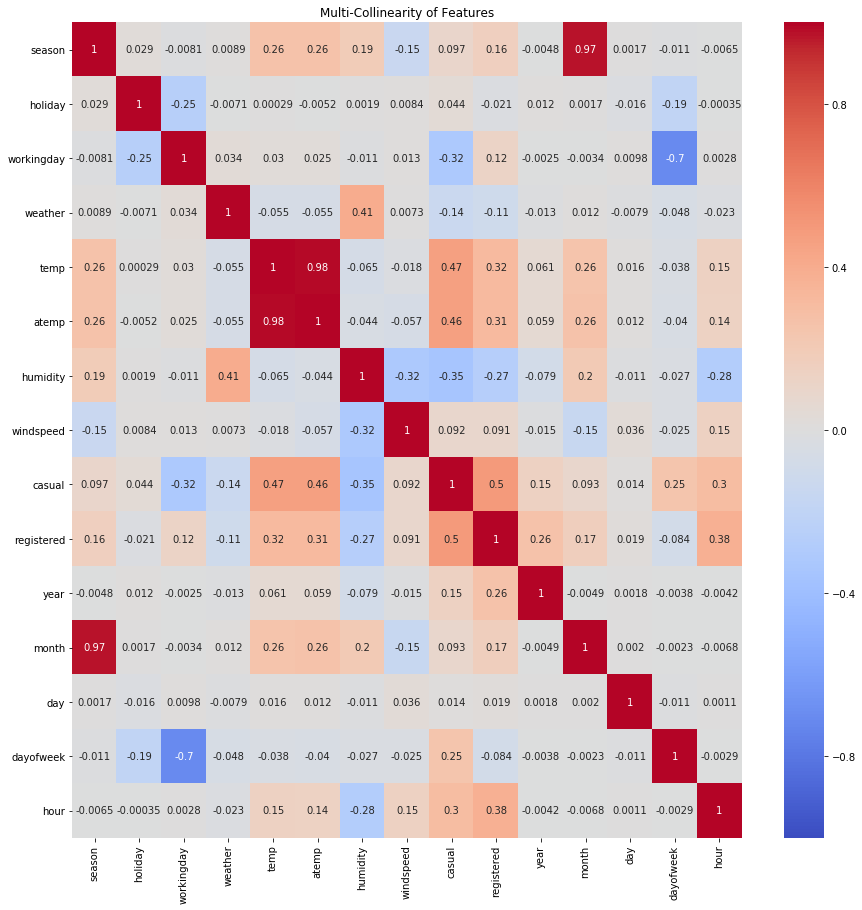

In [15]:
ax = sns.heatmap(corr_data, annot=True, xticklabels=corr_data.columns, yticklabels=corr_data.columns,
           vmin=-1, vmax=1, center=0, cmap='coolwarm')
ax.figure.set_figwidth(15)
ax.figure.set_figheight(15)
ax.set_title('Multi-Collinearity of Features')

In [16]:
# Normalise df_parsed. A normalisation function is written for the same. 
# count_val_norm -> Contains the normalised values of count column

In [17]:
normalise(df_parsed)
count_val_norm = df_parsed['count']
df_parsed.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,0.0,0.0,0.0,0.0,0.224490,0.305068,0.81,0.0,0.008174,0.014673,0.015369,0.0,0.0,0.0,0.833333,0.000000
1,0.0,0.0,0.0,0.0,0.204082,0.288064,0.80,0.0,0.021798,0.036117,0.039959,0.0,0.0,0.0,0.833333,0.043478
2,0.0,0.0,0.0,0.0,0.204082,0.288064,0.80,0.0,0.013624,0.030474,0.031762,0.0,0.0,0.0,0.833333,0.086957
3,0.0,0.0,0.0,0.0,0.224490,0.305068,0.75,0.0,0.008174,0.011287,0.012295,0.0,0.0,0.0,0.833333,0.130435
4,0.0,0.0,0.0,0.0,0.224490,0.305068,0.75,0.0,0.000000,0.001129,0.000000,0.0,0.0,0.0,0.833333,0.173913


In [18]:
# Removing atemp,season,dayofweek,count, casual, registered from the data. 

In [19]:
df_parsed.drop(['atemp','season','dayofweek','casual','registered','humidity'], axis=1, inplace=True)
df_parsed.drop(['count'], axis=1, inplace=True)

In [20]:
# Splitting the data in 80:20 ratio for training and validation
# df_train_x, cnt_train_y -> training set of features and output respectively
# df_val_x, cnt_val_y -> validation set of features and output respectively
# All are in dataframe format only

In [21]:
train_len = int(0.8 * len(df_parsed))
df_train_x = df_parsed[:train_len]
cnt_train_y = count_val_norm[:train_len]
df_val_x = df_parsed[train_len:]
cnt_val_y = count_val_norm[train_len:]

In [22]:
# Applying Gradient descent to minimise the negative log likelihood. 
# The gradient descent function requires the data in the form of ndarrays. Hence,
# converting to the required format before passing to the function.

In [23]:
w = grad_descent(np.array(df_train_x),np.array(cnt_train_y))

w =  [1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05]
Loss =  8708.23479087404194
w =  [-0.11893539 -2.93340415 -0.61235455 -1.98362546 -0.9705009  -1.52084559
 -1.77719566 -2.12136802 -2.0494474 ]
Loss =  11363.8048432677299635
w =  [-0.09648893 -2.3017333  -0.51849223 -1.47606872 -0.75275226 -1.07642154
 -1.36731739 -1.671099   -1.48873543]
Loss =  8743.805353086363192
w =  [-0.07726849 -1.68341711 -0.43193477 -0.99082416 -0.54702296 -0.64644176
 -0.97673858 -1.24229096 -0.9501016 ]
Loss =  6403.8489249226167566
w =  [-0.06656073 -1.12277103 -0.36564742 -0.57471419 -0.37708604 -0.2688158
 -0.64586277 -0.88013745 -0.48266843]
Loss =  4875.388335548518862
w =  [-0.07493597 -0.77957975 -0.35351747 -0.36006134 -0.30729083 -0.06406482
 -0.485816   -0.71179192 -0.22885444]
Loss =  4610.855031055685808
w =  [-0.10181629 -0.78111342 -0.40952193 -0.41377301 -0.36706422 -0.10930127
 -0.54811902 -0.79906588 -0.26519834]
Loss =  4591.1210161468424076
w =  [-0.12060822 -0.69900546

In [24]:
# lamda_train -> Predicted values for training dataset from the obtained weights.
# lamda_val -> Predicted values for validation dataset from the obtained weights.
# train_RMSE -> RMSE value of the training dataset
# val_RMSE -> RMSE value of the validation dataset
# Rate paramter for the whole training+validation dataset

In [25]:
lamda_train = np.exp(df_train_x@w)
lamda_val = np.exp(df_val_x@w)
train_RMSE = calc_RMSE(np.array(lamda_train),np.array(cnt_train_y))
val_RMSE = calc_RMSE(np.array(lamda_val),np.array(cnt_val_y))
print("RMSE values:")
print("RMSE for training dataset = ", train_RMSE)
print("RMSE for validation dataset = ", val_RMSE)
print("===========================================================")
Rate = np.exp(df_parsed@w)
print("Rate parameter:")
print(Rate)
print("===========================================================")
mean_Rate = sum(Rate)/df_parsed.shape[0]
print("Rate parameter mean = ", mean_Rate)

RMSE values:
RMSE for training dataset =  0.21727643224168340556
RMSE for validation dataset =  0.26376389055913943897
Rate parameter:
0        0.987121
1        0.994600
2        1.000955
3        1.006165
4        1.012595
           ...   
10881    0.054526
10882    0.073555
10883    0.074112
10884    0.094692
10885    0.088123
Length: 10886, dtype: float128
Rate parameter mean =  0.20261831678226194646


In [26]:
w_Lasso = lasso_regression(np.array(df_train_x),np.array(cnt_train_y))

w =  [1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05]
Loss =  8708.2348358740419405
w =  [-0.12163539 -2.93610415 -0.61505455 -1.98632546 -0.9732009  -1.52354559
 -1.77989566 -2.12406802 -2.0521474 ]
Loss =  11385.885435843544402
w =  [-0.096472   -2.30170132 -0.51846099 -1.47599034 -0.75270803 -1.07637587
 -1.36725047 -1.67102315 -1.48866156]
Loss =  8748.866295555449995
w =  [-0.0745524  -1.68068789 -0.42920525 -0.98805108 -0.54428152 -0.64369945
 -0.97397635 -1.23952029 -0.94733299]
Loss =  6394.9429197441193726
w =  [-0.06127188 -1.11799586 -0.36046245 -0.57002363 -0.37205084 -0.2639996
 -0.64107487 -0.87542764 -0.4780064 ]
Loss =  4866.6373076883919016
w =  [-0.07291424 -0.77683879 -0.34691877 -0.35710486 -0.30176932 -0.06052679
 -0.48207074 -0.70868237 -0.22618873]
Loss =  4615.440569968239689
w =  [-0.10306456 -0.78845634 -0.40751009 -0.41973087 -0.36732922 -0.11438987
 -0.55224518 -0.80465149 -0.27187177]
Loss =  4595.372697982563272
w =  [-0.12398825 -0.6933522

In [27]:
print("RMSE for Lasso regression: ")
print("Training data = ",calc_RMSE(np.exp(df_train_x@w_Lasso), cnt_train_y))
print("validation data = ",calc_RMSE(np.exp(df_val_x@w_Lasso), cnt_val_y))

RMSE for Lasso regression: 
Training data =  0.2160644790504687108
validation data =  0.26556029392637512014


In [28]:
w_ridge = ridge_regression(np.array(df_train_x),np.array(cnt_train_y))

w =  [1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05]
Loss =  8708.2347908744919405
w =  [-0.1189354  -2.93340415 -0.61235455 -1.98362546 -0.9705009  -1.5208456
 -1.77719567 -2.12136803 -2.0494474 ]
Loss =  11377.826105836342421
w =  [-0.09641757 -2.29997327 -0.51812483 -1.47487855 -0.75216997 -1.07550903
 -1.36625108 -1.66982618 -1.48750577]
Loss =  8745.579527244342916
w =  [-0.07715196 -1.68034378 -0.43128607 -0.98884181 -0.54603873 -0.64494499
 -0.97493385 -1.24010716 -0.94807195]
Loss =  6398.4661877511265424
w =  [-0.06645677 -1.11920682 -0.36489353 -0.57267106 -0.37604605 -0.26733728
 -0.64393657 -0.87773178 -0.48062042]
Loss =  4871.6208850186839623
w =  [-0.07494608 -0.77766843 -0.35305889 -0.35958202 -0.30696129 -0.0640413
 -0.48513269 -0.71072937 -0.22853727]
Loss =  4612.108392917814238
w =  [-0.10184496 -0.78073385 -0.40921086 -0.41438249 -0.36718054 -0.11027898
 -0.54827658 -0.7988914  -0.26611622]
Loss =  4592.291721401639749
w =  [-0.12052644 -0.69778625

In [29]:
#RMSE Value
#Training data
#Validation data
print("RMSE for Ridge regression: ")
print("Training data = ",calc_RMSE(np.exp(df_train_x@w_ridge), cnt_train_y))
print("validation data = ",calc_RMSE(np.exp(df_val_x@w_ridge), cnt_val_y))

RMSE for Ridge regression: 
Training data =  0.21727785700072511415
validation data =  0.2636579261448682236


In [30]:
# Statistics on the entire train data(training+validation). df_train and count_val are
# used because they contain raw data.

In [31]:
#Statistics of Features
Total_Count = sum(count_val)
count_per_year = Total_Count/df_train['year'].nunique()
print("Average number of bikes rented per year = ", count_per_year)

Average number of bikes rented per year =  1042738.0


In [32]:
#Statistics of Features
group_year = df_train.groupby(['year'])
average_year = group_year['count'].mean()
print("Hourly mean of bikes rented - year wise: ")
print(average_year)
df_year = average_year.to_frame()
df_year.insert(0, 'Year', df_train['year'].unique())
df_year.rename(columns={'count': 'Average bikes rented'}, inplace=True)

Hourly mean of bikes rented - year wise: 
year
2011    144.223349
2012    238.560944
Name: count, dtype: float64


In [33]:
#Statistics of Features
group_month = df_train.groupby(['month'])
average_month = group_month['count'].mean()
sum_month = group_month['count'].sum()
df_month = sum_month.to_frame()
df_month.insert(0, 'month', df_train['month'].unique())
df_month.rename(columns={'count': 'Total bikes rented'}, inplace=True)
print("Hourly mean of bikes rented - month wise: ")
print(average_month)

Hourly mean of bikes rented - month wise: 
month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64


In [34]:
#Statistics of Features
group_season = df_train.groupby(['season'])
average_season = group_season['count'].mean()
print("Hourly mean of bikes rented - season wise: ")
print(average_season)
df_season = average_season.to_frame()
df_season.insert(0, 'season', df_train['season'].unique())
df_season.rename(columns={'count': 'Average bikes rented'}, inplace=True)

Hourly mean of bikes rented - season wise: 
season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64


In [35]:
#Statistics of Features
group_weather = df_train.groupby(['weather'])
average_weather = group_weather['count'].mean()
print("Hourly mean of bikes rented - weather wise: ")
print(average_weather)
df_weather = average_weather.to_frame()
df_weather.insert(0, 'weather', df_train['weather'].unique())
df_weather.rename(columns={'count': 'Average bikes rented'}, inplace=True)

Hourly mean of bikes rented - weather wise: 
weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64


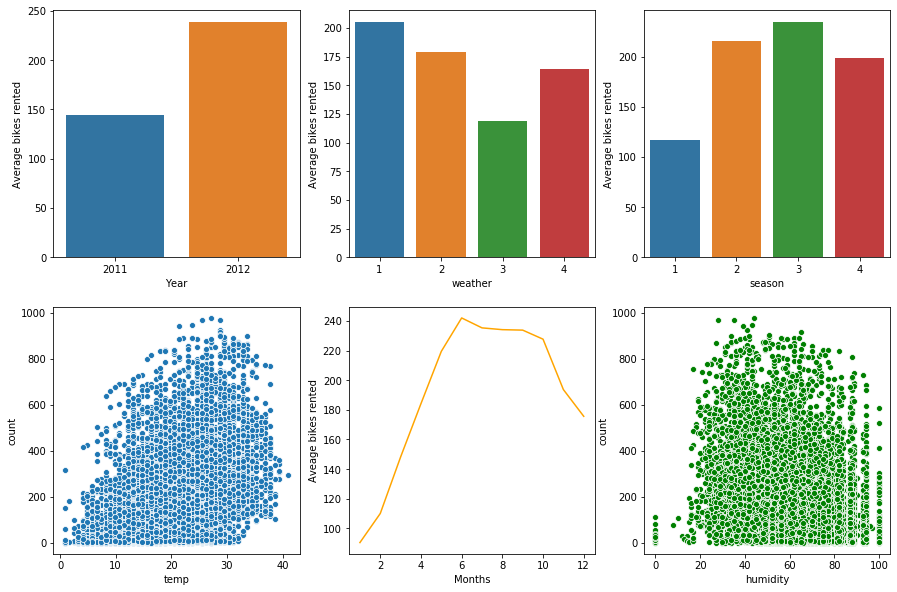

In [36]:
fig, ax = plt.subplots(2, 3)
ax[0][0].figure.set_figwidth(15)
ax[0][0].figure.set_figheight(10)

sns.barplot(x = 'Year', y = 'Average bikes rented', data = df_year, ax = ax[0][0])
sns.barplot(x = 'weather', y = 'Average bikes rented', data = df_weather, ax = ax[0][1])
sns.barplot(x = 'season', y = 'Average bikes rented', data = df_season, ax = ax[0][2])
sns.scatterplot(x=df_train.temp,y=df_train["count"],ax=ax[1][0])
ax[1][1].plot(average_month.index,average_month, c='orange')
ax[1][1].set_xlabel('Months')
ax[1][1].set_ylabel('Aveage bikes rented')
sns.scatterplot(x=df_train.humidity,y=df_train["count"],ax=ax[1][2], color='green')

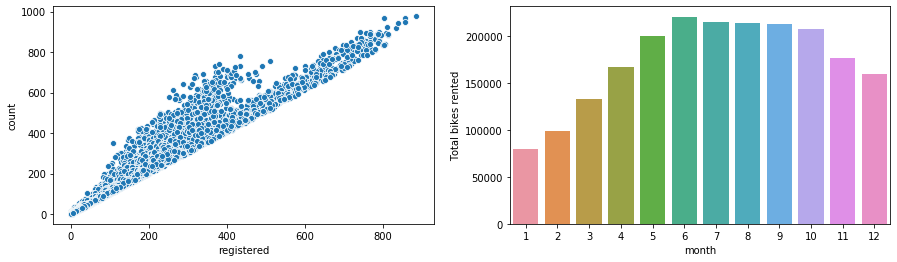

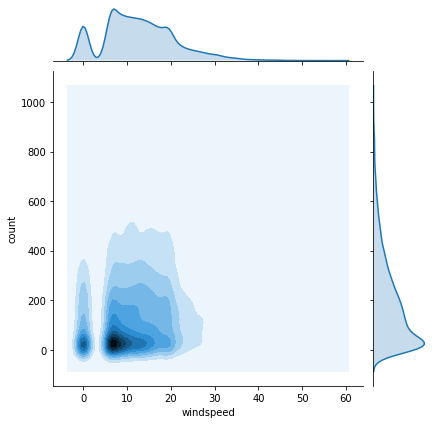

In [37]:
fig, ax = plt.subplots(1, 2)
ax[0].figure.set_figwidth(15)
sns.scatterplot(x=df_train.registered,y=df_train["count"], ax=ax[0])
sns.barplot(x = 'month', y = 'Total bikes rented', data = df_month, ax = ax[1])
sns.jointplot(x=df_train.windspeed, y=df_train["count"], kind='kde')

In [38]:
w

array([-0.54002184, -0.54848207, -1.29795405, -0.05774403, -1.51185166,
       -0.07530485, -0.77360886, -0.92177805,  0.14650406], dtype=float128)

In [39]:
normalise(test_df)

In [40]:
count_test = test_df['count'].values
test_df.drop(['count'], axis=1, inplace=True)

In [41]:
lamda_test = np.exp(test_df@w)
test_RMSE = calc_RMSE(np.array(lamda_test),np.array(count_test))
print("RMSE for test data = ",test_RMSE)

RMSE for test data =  0.22028608869976792949


In [42]:
lamda_pred = np.copy(lamda_test)
lamda_ret = denormalise_count(lamda_pred)

In [43]:
#predicted Lambda
lamda_pred

array([0.37040309, 0.18968775, 0.19089987, ..., 0.08234304, 0.08747463,
       0.0880336 ], dtype=float128)

In [44]:
test_RMSLE_Norm = calc_RMSLE(np.array(lamda_test),np.array(count_test))
print("RMSLE for normalised test data = ",test_RMSLE_Norm)

RMSLE for normalised test data =  0.17254888935117504073


In [45]:
test_RMSLE_Actual = calc_RMSLE(np.array(lamda_ret),np.array(count_direct))
print("RMSLE for actual test data = ",test_RMSLE_Actual)

RMSLE for actual test data =  1.6144768455116842809


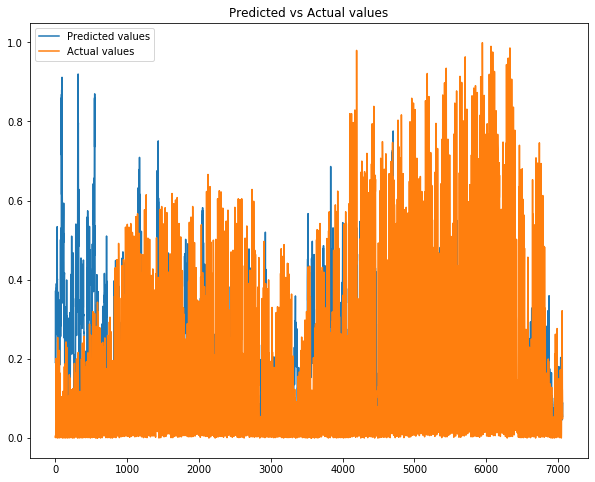

In [46]:
#Plot of predicted vs actual
fig, ax = plt.subplots()
ax.figure.set_figwidth(10)
ax.figure.set_figheight(8)
ax.plot(lamda_pred, label = 'Predicted values')
ax.plot(count_test, label = 'Actual values')
ax.set_title("Predicted vs Actual values")
plt.legend(loc='upper left')

Text(0.5, 1.0, 'Residual plot')

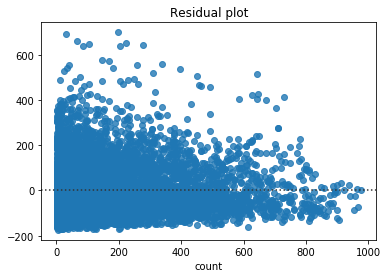

In [47]:
#Residual plot for predicted vs actual
ax = sns.residplot(count_direct, lamda_ret)
ax.set_title("Residual plot")